In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
df = pd.read_pickle('English_Headlines_EngFeatures.pkl')
df

,Statement,Rating,cleaned,cleaned tokenized,tokens,statement length,word count,sentence count,unique words,lexical richness,...,numerical%,sexual anatomy / sexual acts,bodily fluids / excrement,sexual orientation / gender,racial / ethnic slurs,animal references,internet slang,profanity_level,bigrams,trigrams
0,Changing our clocks is a health hazard. Just a...,1,changing clocks health hazard ask sleep doctor,"[changing, clock, health, hazard, ., ask, slee...","[Changing, our, clocks, is, a, health, hazard,...",13,46,2,11,40.32,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.012298,"[changing clocks, clocks health, health hazard...","[changing clocks health, clocks health hazard,..."
1,How the Alec Baldwin fatal film set shooting u...,1,alec baldwin fatal film set shooting unfolded,"[alec, baldwin, fatal, film, set, shooting, un...","[How, the, Alec, Baldwin, fatal, film, set, sh...",9,45,1,9,9.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.025994,"[alec baldwin, baldwin fatal, fatal film, film...","[alec baldwin fatal, baldwin fatal film, fatal..."
2,A 90-year-old tortoise named Mr. Pickles just ...,1,90 year old tortoise named mr pickles became f...,"[90-year-old, tortoise, named, mr., pickle, be...","[A, 90-year-old, tortoise, named, Mr., Pickles...",19,62,2,17,35.84,...,0.052632,0.0,0.0,0.0,0.0,0.0,0.000000,0.031957,"[90 year, year old, old tortoise, tortoise nam...","[90 year old, year old tortoise, old tortoise ..."
3,Alabama governor ousts a top education officia...,1,alabama governor ousts top education official ...,"[alabama, governor, ousts, top, education, off...","[Alabama, governor, ousts, a, top, education, ...",17,69,1,14,63.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.010403,"[alabama governor, governor ousts, ousts top, ...","[alabama governor ousts, governor ousts top, o..."
4,"2 people are dead, 20 missing, as a migrant bo...",1,2 people dead 20 missing migrant boat sinks co...,"[2, people, dead, ,, 20, missing, ,, migrant, ...","[2, people, are, dead, ,, 20, missing, ,, as, ...",18,57,1,16,14.00,...,0.111111,0.0,0.0,0.0,0.0,0.0,0.000000,0.065102,"[2 people, people dead, dead 20, 20 missing, m...","[2 people dead, people dead 20, dead 20 missin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,Health Ranger Report: Gregory Mannarino dubs c...,0,health ranger report gregory mannarino dubs ce...,"[health, ranger, report, :, gregory, mannarino...","[Health, Ranger, Report, :, Gregory, Mannarino...",17,108,1,15,71.68,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.121624,"[health ranger, ranger report, report gregory,...","[health ranger report, ranger report gregory, ..."
6544,Trans Activist Threatens Women Who Try To Stop...,0,trans activist threatens women try stop using ...,"[trans, activist, threatens, woman, try, stop,...","[Trans, Activist, Threatens, Women, Who, Try, ...",14,55,1,14,12.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.071429,0.120767,"[trans activist, activist threatens, threatens...","[trans activist threatens, activist threatens ..."
6545,Justin Trudeau Announces $5.5 Million To ‘Cens...,0,justin trudeau announces 5 5 million censor in...,"[justin, trudeau, announces, $, 5.5, million, ...","[Justin, Trudeau, Announces, $, 5.5, Million, ...",12,61,1,12,8.00,...,0.083333,0.0,0.0,0.0,0.0,0.0,0.083333,0.196001,"[justin trudeau, trudeau announces, announces ...","[justin trudeau announces, trudeau announces 5..."
6546,Rasmussen final Generic Congressional Ballot: ...,0,rasmussen final generic congressional ballot 4...,"[rasmussen, final, generic, congressional, bal...","[Rasmussen, final, Generic, Congressional, Bal...",19,84,1,14,33.88,...,0.111111,0.0,0.0,0.0,0.0,0.0,0.000000,0.192476,"[rasmussen final, final generic, generic congr...","[rasmussen final generic, final generic congre..."


In [3]:
sentences = df['Statement'].values
y = df['Rating'].values

In [4]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2, random_state=49)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(sentences)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [6]:
input_dim = X_train.shape[1]

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [9]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences)

In [10]:
sentences

array(['Changing our clocks is a health hazard. Just ask a sleep doctor',
       'How the Alec Baldwin fatal film set shooting unfolded',
       "A 90-year-old tortoise named Mr. Pickles just became a father of 3. It's a big 'dill'",
       ...,
       'Justin Trudeau Announces $5.5 Million To ‘Censor Independent Media’',
       'Rasmussen final Generic Congressional Ballot: 48% GOP 43% DEM – GOP +13 with  independent voters',
       'Kevin McCarthy caves (as expected), appoints Ilhan Omar to House Foreign Affairs Committee'],
      dtype=object)

In [15]:
tokenizer

In [11]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2, random_state=49)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [12]:
X_test

[[1681, 10, 2, 5, 62, 4, 533, 12, 1494, 1851, 10, 861, 1, 510, 606, 4, 2755],
 [3722, 2153, 1113, 1117, 428, 1, 114, 2, 2743],
 [35, 4537, 639, 1, 4538, 2809, 1208],
 [2040, 574, 3, 13, 371, 4, 18, 335, 774],
 [28, 15, 3629, 880, 11, 26, 4780, 579],
 [16, 268, 402, 831, 73, 30, 849, 31, 283, 183, 533],
 [143, 170, 327, 3572, 204, 4, 458, 1, 84, 389, 174, 500, 621],
 [342, 1145, 2660, 1688, 3306, 147],
 [15, 50, 212, 38, 1, 1672, 9],
 [156, 691, 37, 4, 630, 413, 8, 839, 644, 1, 75, 341],
 [2646, 584, 1807, 1710, 1, 3516, 984, 373, 7, 2647, 2, 2648],
 [620, 750, 3170, 270, 23, 3, 7, 130, 557],
 [954, 228, 968, 598, 27, 168, 6, 43, 2, 267],
 [483, 754, 403, 36, 20, 2009],
 [360, 5, 557, 1284, 21, 4115, 130, 1427, 972],
 [1094, 224, 505, 3363, 2, 338, 9, 4393],
 [864, 2242, 1, 3, 64, 29, 20],
 [17, 932, 7, 17, 137, 3557, 6, 5, 2858, 1037],
 [482, 18, 219, 1154, 1116, 2075, 1, 1746, 2, 537],
 [46, 3840, 22, 3015, 2000, 1162],
 [508, 550, 106, 577],
 [2127, 3700, 19, 3856, 1264, 2, 81, 1558]

In [311]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [312]:
X_train.shape

(5238, 100)

In [313]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [314]:
embedding_dim = 100
embedding_matrix = create_embedding_matrix(
    'glove/glove.6B.100d.txt',
    tokenizer.word_index, embedding_dim)

In [315]:
vocab_size = len(tokenizer.word_index) + 1

In [316]:
from keras.models import Sequential
from keras import layers


In [317]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='tanh'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='RMSProp',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1377000   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,442,429
Trainable params: 1,442,429
Non-trainable params: 0
______________________________________________

Epoch 1/20
164/164 [==============================] - 2s 9ms/step - loss: 0.5339 - accuracy: 0.7325 - val_loss: 0.4282 - val_accuracy: 0.7985
Epoch 2/20
164/164 [==============================] - 1s 7ms/step - loss: 0.2589 - accuracy: 0.8944 - val_loss: 0.3809 - val_accuracy: 0.8244
Epoch 3/20
164/164 [==============================] - 1s 7ms/step - loss: 0.1556 - accuracy: 0.9414 - val_loss: 0.3738 - val_accuracy: 0.8511
Epoch 4/20
164/164 [==============================] - 1s 7ms/step - loss: 0.0812 - accuracy: 0.9744 - val_loss: 0.4166 - val_accuracy: 0.8504
Epoch 5/20
164/164 [==============================] - 1s 7ms/step - loss: 0.0378 - accuracy: 0.9903 - val_loss: 0.4757 - val_accuracy: 0.8496
Epoch 6/20
164/164 [==============================] - 1s 7ms/step - loss: 0.0136 - accuracy: 0.9973 - val_loss: 0.5822 - val_accuracy: 0.8443
Epoch 7/20
164/164 [==============================] - 1s 7ms/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.6714 - val_accuracy: 0.8458
Epoch 

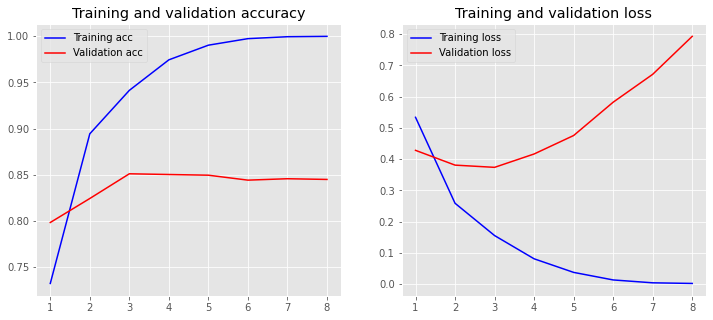

In [318]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

STAMP = f'CNN_Glove_Vectors'
early_stopping =EarlyStopping(monitor='val_loss', patience=5)
bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)

history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32, callbacks=[early_stopping, model_checkpoint])

model.load_weights(bst_model_path)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [418]:
from tensorflow import keras
from keras import optimizers


model2 = Sequential()
model2.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model2.add(layers.Conv1D(128, 5, activation='tanh'))
model2.add(layers.GlobalMaxPooling1D())
model2.add(layers.Dense(10, activation='tanh'))
model2.add(layers.Dense(1, activation='sigmoid'))

opt = optimizers.rmsprop_v2.RMSProp(learning_rate=0.001)

model2.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 100)          8200      
                                                                 
 conv1d_9 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_9 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 73,629
Trainable params: 73,629
Non-trainable params: 0
__________________________________________________

Epoch 1/500
328/328 [==============================] - 4s 10ms/step - loss: 0.5175 - accuracy: 0.7232 - val_loss: 0.4367 - val_accuracy: 0.7626
Epoch 2/500
328/328 [==============================] - 3s 9ms/step - loss: 0.3757 - accuracy: 0.8209 - val_loss: 0.3779 - val_accuracy: 0.8107
Epoch 3/500
328/328 [==============================] - 3s 9ms/step - loss: 0.3154 - accuracy: 0.8557 - val_loss: 0.4074 - val_accuracy: 0.7908
Epoch 4/500
328/328 [==============================] - 3s 8ms/step - loss: 0.2684 - accuracy: 0.8868 - val_loss: 0.4703 - val_accuracy: 0.7779
Epoch 5/500
328/328 [==============================] - 3s 9ms/step - loss: 0.2222 - accuracy: 0.9078 - val_loss: 0.3390 - val_accuracy: 0.8405
Epoch 6/500
328/328 [==============================] - 3s 9ms/step - loss: 0.1797 - accuracy: 0.9275 - val_loss: 0.4061 - val_accuracy: 0.8267
Epoch 7/500
328/328 [==============================] - 3s 9ms/step - loss: 0.1493 - accuracy: 0.9422 - val_loss: 0.3926 - val_accuracy: 0.835

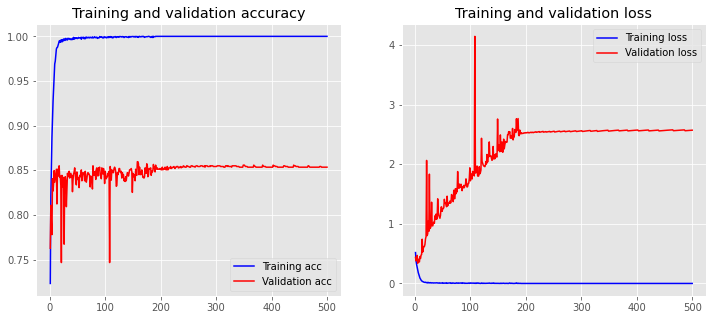

In [419]:
history = model2.fit(X_train, y_train,
                    epochs=500,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=16, shuffle=True)


loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [420]:
model2.save('headline_classifiers_english/CNN_Classifier_GLOVE_85.34')

INFO:tensorflow:Assets written to: headline_classifiers_english/CNN_Classifier_GLOVE_85.34\assets


In [319]:
tf.keras.backend.clear_session()

In [66]:

def create_CNNModel(hl, ol, act, l_func):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(128, 5, activation=hl))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation=hl))
    model.add(layers.Dense(1, activation=ol))
    model.compile(optimizer=act,
                loss=l_func,
                metrics=['accuracy'])
    return model

In [69]:
hl_f = ['sigmoid','tanh','relu','LeakyReLU','PReLU']
ol_f = ['sigmoid','tanh','relu','LeakyReLU','PReLU']
act = ['SGD', 'RMSprop','Adam','Adagrad','Adamax']
loss_func = ['sparse_categorical_crossentropy', 'binary_crossentropy', 'binary_crossentropy', 'categorical_crossentropy']
count = 0
for i in hl_f:
    for j in ol_f:
        for k in act:
            for l in loss_func:
                count = count + 1
print(count)

500


In [72]:
from collections import defaultdict

hl_f = ['sigmoid','tanh','relu','LeakyReLU','PReLU']
ol_f = ['sigmoid','tanh','relu','LeakyReLU','PReLU']
act = ['SGD', 'RMSprop','Adam','Adagrad','Adamax']
loss_func = ['sparse_categorical_crossentropy', 'binary_crossentropy', 'categorical_crossentropy']

table = defaultdict(list)
count = 0
for i in hl_f:
    for j in ol_f:
        for k in act:
            for l in loss_func:
                table['hl_f'].append(i)
                table['ol_f'].append(j)
                table['k_f'].append(k)

                model = create_CNNModel(i, j, k, l)

                history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=32)
                loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

                table['accuracy'].append(accuracy)
                table['loss'].append(loss)
                count = count + 1
                print(f'model {count}/500 done')
                tf.keras.backend.clear_session()
                with open('accuracies.txt', 'a') as f:
                    f.write('\n'+str(accuracy))


model 1/500 done
model 2/500 done
model 3/500 done
model 4/500 done
model 5/500 done
model 6/500 done
model 7/500 done
model 8/500 done
model 9/500 done
model 10/500 done
model 11/500 done
model 12/500 done
model 13/500 done
model 14/500 done
model 15/500 done
model 16/500 done
model 17/500 done
model 18/500 done
model 19/500 done
model 20/500 done
model 21/500 done
model 22/500 done
model 23/500 done
model 24/500 done
model 25/500 done
model 26/500 done
model 27/500 done
model 28/500 done
model 29/500 done
model 30/500 done
model 31/500 done
model 32/500 done
model 33/500 done
model 34/500 done
model 35/500 done
model 36/500 done
model 37/500 done
model 38/500 done
model 39/500 done
model 40/500 done
model 41/500 done
model 42/500 done
model 43/500 done
model 44/500 done
model 45/500 done
model 46/500 done
model 47/500 done
model 48/500 done
model 49/500 done
model 50/500 done
model 51/500 done
model 52/500 done
model 53/500 done
model 54/500 done
model 55/500 done
model 56/500 done
m

In [73]:
table

defaultdict(list,
            {'hl_f': ['sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',
              'sigmoid',

In [74]:
import pandas as pd
df_results = pd.DataFrame(table)
df_results

,hl_f,ol_f,k_f,accuracy,loss
0,sigmoid,sigmoid,SGD,0.496947,NaN
1,sigmoid,sigmoid,SGD,0.496947,6.932043e-01
2,sigmoid,sigmoid,SGD,0.496947,6.931891e-01
3,sigmoid,sigmoid,SGD,0.496947,0.000000e+00
4,sigmoid,sigmoid,RMSprop,0.496947,NaN
...,...,...,...,...,...
495,PReLU,PReLU,Adagrad,0.496947,NaN
496,PReLU,PReLU,Adamax,0.496947,NaN
497,PReLU,PReLU,Adamax,0.822901,8.660145e-01
498,PReLU,PReLU,Adamax,0.814504,7.813532e-01


In [76]:
df_results.sort_values('accuracy', ascending= False)

,hl_f,ol_f,k_f,accuracy,loss
106,tanh,sigmoid,RMSprop,0.842748,1.810555e+00
109,tanh,sigmoid,Adam,0.839695,8.714250e-01
105,tanh,sigmoid,RMSprop,0.838931,1.850355e+00
405,PReLU,sigmoid,RMSprop,0.837405,1.523167e+00
406,PReLU,sigmoid,RMSprop,0.836641,1.446959e+00
...,...,...,...,...,...
200,relu,sigmoid,SGD,0.496947,NaN
199,tanh,PReLU,Adamax,0.496947,NaN
499,PReLU,PReLU,Adamax,0.496947,5.996865e-08
14,sigmoid,sigmoid,Adagrad,0.493130,6.932580e-01


In [78]:
df_results.to_csv('CNN_Experiment_Results_ENGLISH.csv')

In [320]:
tf.keras.backend.clear_session()

In [400]:

tokenizer = Tokenizer(num_words=5000, char_level=True)
tokenizer.fit_on_texts(sentences)
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2, random_state=49)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_train.shape

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix
embedding_dim = 100
embedding_matrix = create_embedding_matrix(
    'glove/glove.6B.100d.txt',
    tokenizer.word_index, embedding_dim)
vocab_size = len(tokenizer.word_index) + 1

In [394]:
# model = Sequential()
# model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
# model.add(layers.Conv1D(128, 5, activation='tanh'))
# model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Dense(10, activation='tanh'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='RMSProp',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.summary()

In [395]:
RNN_model = Sequential()
RNN_model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
RNN_model.add(layers.Bidirectional(layers.LSTM(64)))
RNN_model.add(layers.Dense(24, activation='relu'))
RNN_model.add(layers.Dense(1, activation='sigmoid'))
RNN_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
RNN_model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 100, 100)          8200      
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dense_34 (Dense)            (None, 24)                3096      
                                                                 
 dense_35 (Dense)            (None, 1)                 25        
                                                                 
Total params: 95,801
Trainable params: 95,801
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
164/164 [==============================] - 6s 19ms/step - loss: 0.5772 - accuracy: 0.6800 - val_loss: 0.5277 - val_accuracy: 0.7389
Epoch 2/50
164/164 [==============================] - 2s 15ms/step - loss: 0.4879 - accuracy: 0.7543 - val_loss: 0.4477 - val_accuracy: 0.7740
Epoch 3/50
164/164 [==============================] - 2s 15ms/step - loss: 0.4659 - accuracy: 0.7701 - val_loss: 0.4931 - val_accuracy: 0.7504
Epoch 4/50
164/164 [==============================] - 2s 15ms/step - loss: 0.4390 - accuracy: 0.7889 - val_loss: 0.4136 - val_accuracy: 0.7977
Epoch 5/50
164/164 [==============================] - 2s 15ms/step - loss: 0.4225 - accuracy: 0.7961 - val_loss: 0.5280 - val_accuracy: 0.7748
Epoch 6/50
164/164 [==============================] - 2s 15ms/step - loss: 0.4056 - accuracy: 0.8020 - val_loss: 0.4015 - val_accuracy: 0.8015
Epoch 7/50
164/164 [==============================] - 2s 15ms/step - loss: 0.3899 - accuracy: 0.8064 - val_loss: 0.3988 - val_accuracy: 0.8061

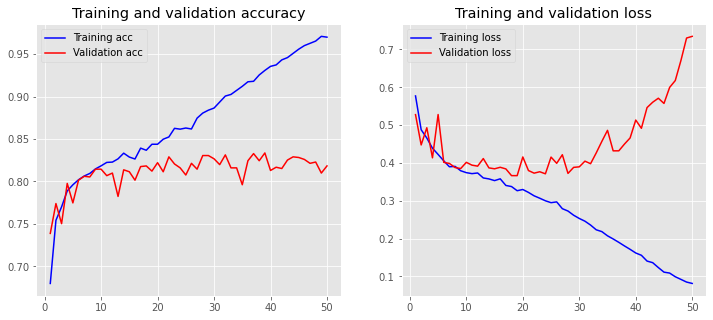

In [396]:
history = RNN_model.fit(X_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32)


loss, accuracy = RNN_model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = RNN_model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [401]:
def create_RNNModel(hl, ol, act):
    RNN_model = Sequential()
    RNN_model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    RNN_model.add(layers.Bidirectional(layers.LSTM(64)))
    RNN_model.add(layers.Dense(24, activation=hl))
    RNN_model.add(layers.Dense(1, activation=ol))
    RNN_model.compile(optimizer=act,
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return RNN_model

In [402]:
from collections import defaultdict

hl_f = ['sigmoid','tanh','relu','LeakyReLU','PReLU']
ol_f = ['sigmoid','tanh','relu','LeakyReLU','PReLU']
act = ['SGD', 'RMSprop','Adam','Adagrad','Adamax']


RNN_table = defaultdict(list)
count = 0
for i in hl_f:
    for j in ol_f:
        for k in act:
            RNN_table['hl_f'].append(i)
            RNN_table['ol_f'].append(j)
            RNN_table['k_f'].append(k)

            model = create_RNNModel(i, j, k)

            history = model.fit(X_train, y_train,
                epochs=20,
                verbose=False,
                validation_data=(X_test, y_test),
                batch_size=32)
            loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

            RNN_table['accuracy'].append(accuracy)
            RNN_table['loss'].append(loss)
            count = count + 1
            print(f'model {count}/125 done, hidden = {i}, output = {j}, optim = {k} || accuracy: {accuracy}')
            tf.keras.backend.clear_session()
            with open('RNN_accuracies.txt', 'a') as f:
                f.write('\n'+str(accuracy))

model 1/125 done, hidden = sigmoid, output = sigmoid, optim = SGD || accuracy: 0.665648877620697
model 2/125 done, hidden = sigmoid, output = sigmoid, optim = RMSprop || accuracy: 0.8038167953491211
model 3/125 done, hidden = sigmoid, output = sigmoid, optim = Adam || accuracy: 0.8106870055198669
model 4/125 done, hidden = sigmoid, output = sigmoid, optim = Adagrad || accuracy: 0.6603053212165833
model 5/125 done, hidden = sigmoid, output = sigmoid, optim = Adamax || accuracy: 0.7961832284927368
model 6/125 done, hidden = sigmoid, output = tanh, optim = SGD || accuracy: 0.6809160113334656
model 7/125 done, hidden = sigmoid, output = tanh, optim = RMSprop || accuracy: 0.4969465732574463
model 8/125 done, hidden = sigmoid, output = tanh, optim = Adam || accuracy: 0.761832058429718
model 9/125 done, hidden = sigmoid, output = tanh, optim = Adagrad || accuracy: 0.6641221642494202
model 10/125 done, hidden = sigmoid, output = tanh, optim = Adamax || accuracy: 0.4969465732574463
model 11/125

In [403]:
df_RNN_res = pd.DataFrame(RNN_table)
df_RNN_res

,hl_f,ol_f,k_f,accuracy,loss
0,sigmoid,sigmoid,SGD,0.665649,0.598240
1,sigmoid,sigmoid,RMSprop,0.803817,0.409422
2,sigmoid,sigmoid,Adam,0.810687,0.400457
3,sigmoid,sigmoid,Adagrad,0.660305,0.686050
4,sigmoid,sigmoid,Adamax,0.796183,0.408673
...,...,...,...,...,...
120,PReLU,PReLU,SGD,0.496947,7.759573
121,PReLU,PReLU,RMSprop,0.806107,0.506312
122,PReLU,PReLU,Adam,0.496947,7.759573
123,PReLU,PReLU,Adagrad,0.667176,0.563651


In [404]:
df_RNN_res.sort_values('accuracy', ascending= False)

,hl_f,ol_f,k_f,accuracy,loss
56,relu,tanh,RMSprop,0.820611,0.509649
51,relu,sigmoid,RMSprop,0.820611,0.400756
102,PReLU,sigmoid,Adam,0.820611,0.368475
26,tanh,sigmoid,RMSprop,0.815267,0.386266
76,LeakyReLU,sigmoid,RMSprop,0.815267,0.396769
...,...,...,...,...,...
24,sigmoid,PReLU,Adamax,0.496947,7.759573
86,LeakyReLU,relu,RMSprop,0.496947,7.759573
71,relu,PReLU,RMSprop,0.496947,7.759573
42,tanh,LeakyReLU,Adam,0.496947,7.759573


In [405]:
df_RNN_res.to_csv('RNN_Experimentation_ENGLISH.csv')

In [428]:

tokenizer = Tokenizer(num_words=5000, char_level=True)
tokenizer.fit_on_texts(sentences)
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2, random_state=49)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_train.shape

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix
embedding_dim = 100
embedding_matrix = create_embedding_matrix(
    'glove/glove.6B.100d.txt',
    tokenizer.word_index, embedding_dim)
vocab_size = len(tokenizer.word_index) + 1
# model = Sequential()
# model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
# model.add(layers.Conv1D(128, 5, activation='tanh'))
# model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Dense(10, activation='tanh'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='RMSProp',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          8200      
                                                                 
 bidirectional (Bidirectiona  (None, 100, 200)         160800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               59648     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1

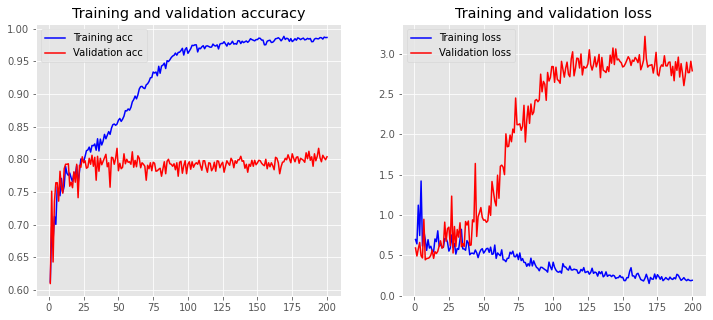

In [429]:
tf.keras.backend.clear_session()
RNN_model = Sequential()
RNN_model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
RNN_model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
RNN_model.add(layers.Bidirectional(layers.LSTM(32)))
RNN_model.add(layers.Dense(64, activation='relu'))
RNN_model.add(layers.Dropout(0.5))
RNN_model.add(layers.Dense(1))
opt = optimizers.rmsprop_v2.RMSProp(learning_rate=0.001)
RNN_model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
RNN_model.summary()
history = RNN_model.fit(X_train, y_train,
                    epochs=200,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32)


loss, accuracy = RNN_model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = RNN_model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 100)          8200      
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              234496    
 nal)                                                            
                                                                 
 dense_22 (Dense)            (None, 64)                16448     
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 259,209
Trainable params: 259,209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
328/328 [==============================] - 10s 20ms/step - loss: 0.6636 - accuracy: 0.6789 - val_loss

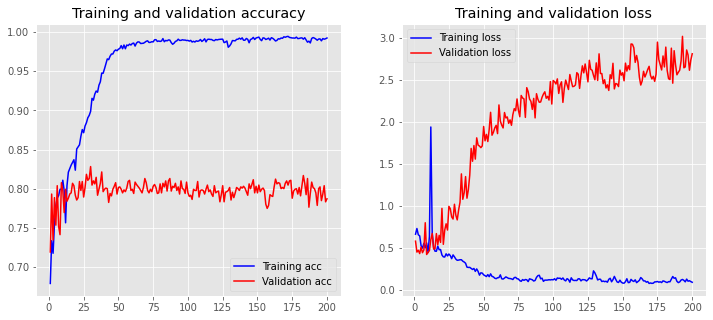

In [423]:


RNN_model = Sequential()
RNN_model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
RNN_model.add(layers.Bidirectional(layers.LSTM(128)))
RNN_model.add(layers.Dense(64, activation='relu'))
RNN_model.add(layers.Dense(1, activation='tanh'))
opt = optimizers.rmsprop_v2.RMSProp(learning_rate=0.001)
RNN_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
RNN_model.summary()
history = RNN_model.fit(X_train, y_train,
                    epochs=200,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=16)


loss, accuracy = RNN_model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = RNN_model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 100)          8200      
                                                                 
 bidirectional_2 (Bidirectio  (None, 512)              731136    
 nal)                                                            
                                                                 
 dense_24 (Dense)            (None, 128)               65664     
                                                                 
 dense_25 (Dense)            (None, 1)                 129       
                                                                 
Total params: 805,129
Trainable params: 805,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
328/328 [==============================] - 11s 23ms/step - loss: 3.1660 - accuracy: 0.5827 - val_loss

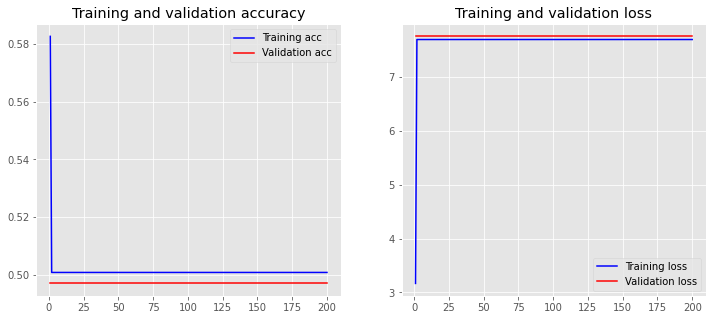

In [424]:
RNN_model = Sequential()
RNN_model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
RNN_model.add(layers.Bidirectional(layers.LSTM(256)))
RNN_model.add(layers.Dense(128, activation='relu'))
RNN_model.add(layers.Dense(1, activation='tanh'))
opt = optimizers.rmsprop_v2.RMSProp(learning_rate=0.001)
RNN_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
RNN_model.summary()
history = RNN_model.fit(X_train, y_train,
                    epochs=200,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=16)


loss, accuracy = RNN_model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = RNN_model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)